# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# EDA

In [5]:
iris_data = load_iris()

In [6]:
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

iris_df['Species'] = iris_data.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [24]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [9]:
iris_df.duplicated().sum()

1

In [10]:
iris_df.drop_duplicates(inplace=True)

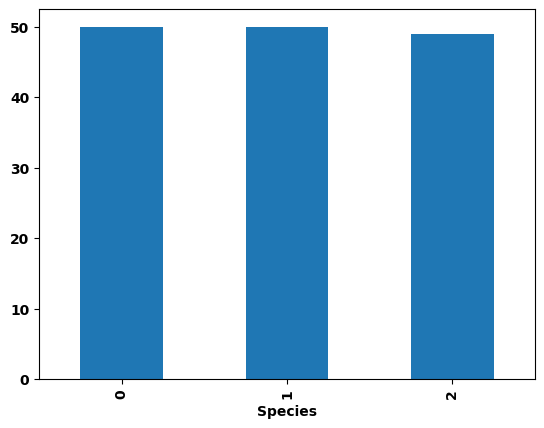

In [18]:
species_counts = iris_df['Species'].value_counts()

species_counts.plot(kind='bar')
plt.show()

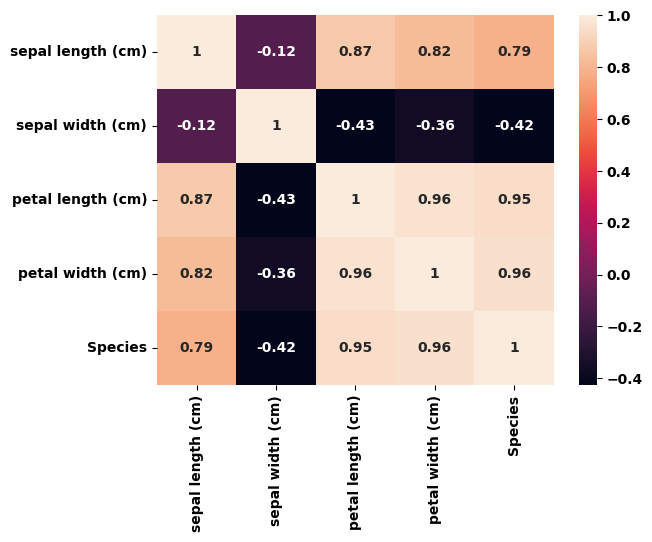

In [19]:
sns.heatmap(iris_df.corr(), annot=True)
plt.show()

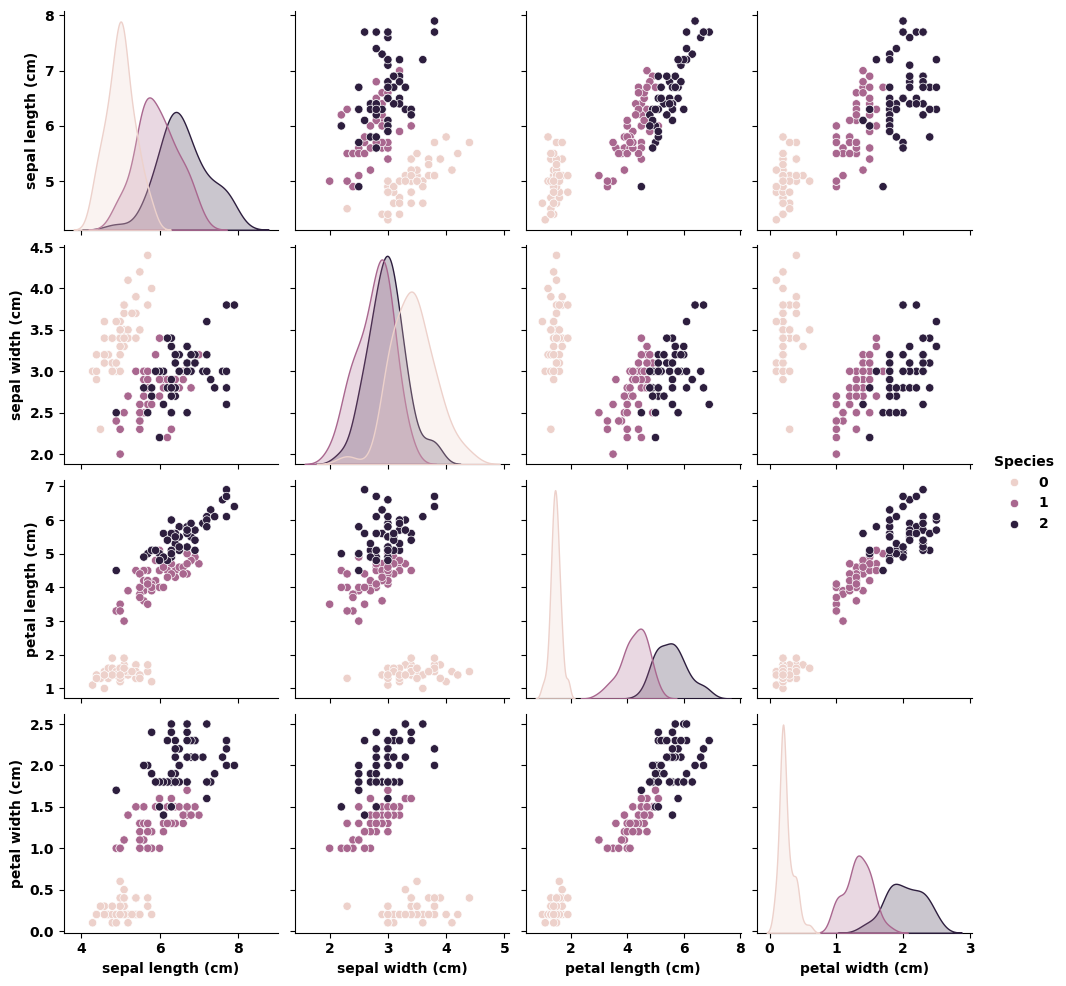

In [21]:
sns.pairplot(iris_df, hue='Species')
plt.show()

# Split the dataset into training and testing sets

In [25]:
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# Standardize the features

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model

In [28]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

history = perceptron.fit(X_train, y_train)

# Predict the labels of the test set

In [29]:
y_pred = perceptron.predict(X_test)

print("Predicted labels for the test set:\n")
print(y_pred)

Predicted labels for the test set:

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Calculate the accuracy of the model

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy : {accuracy:.2f}')

print('\n',classification_report(y_test, y_pred))


Accuracy : 1.00

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Display the first few predictions

In [35]:
# Display the first few predictions
print('First few predictions:\n')
for i in range(5):
    print(f'Sample {i+1}: Predicted Specie Is = {iris_data.target_names[y_pred[i]]}, Actual Specie Is = {iris_data.target_names[y_test.iloc[i]]}')

First few predictions:

Sample 1: Predicted Specie Is = versicolor, Actual Specie Is = versicolor
Sample 2: Predicted Specie Is = setosa, Actual Specie Is = setosa
Sample 3: Predicted Specie Is = virginica, Actual Specie Is = virginica
Sample 4: Predicted Specie Is = versicolor, Actual Specie Is = versicolor
Sample 5: Predicted Specie Is = versicolor, Actual Specie Is = versicolor
